In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

In [25]:
df =pd.read_csv('/content/drive/MyDrive/data_science/EDA-20250310T173139Z-001/EDA/kidney_disease.csv')

In [26]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [27]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [28]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [29]:
df.columns=[
    "Patient ID", "Age", "Blood Pressure", "Specific Gravity", "Albumin", "Sugar",
    "Red Blood Cells", "Pus Cell", "Pus Cell Clumps", "Bacteria", "Blood Glucose Random",
    "Blood Urea", "Serum Creatinine", "Sodium", "Potassium", "Hemoglobin",
    "Packed Cell Volume", "White Blood Cell Count", "Red Blood Cell Count",
    "Hypertension", "Diabetes Mellitus", "Coronary Artery Disease", "Appetite",
    "Pedal Edema", "Anemia", "Disease Classification"
]

In [30]:
df

,Patient ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Disease Classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               400 non-null    int64  
 1   Age                      391 non-null    float64
 2   Blood Pressure           388 non-null    float64
 3   Specific Gravity         353 non-null    float64
 4   Albumin                  354 non-null    float64
 5   Sugar                    351 non-null    float64
 6   Red Blood Cells          248 non-null    object 
 7   Pus Cell                 335 non-null    object 
 8   Pus Cell Clumps          396 non-null    object 
 9   Bacteria                 396 non-null    object 
 10  Blood Glucose Random     356 non-null    float64
 11  Blood Urea               381 non-null    float64
 12  Serum Creatinine         383 non-null    float64
 13  Sodium                   313 non-null    float64
 14  Potassium                3

In [32]:
df['Packed Cell Volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

Convert the object into interger data type

In [33]:
df['Packed Cell Volume'] = pd.to_numeric(df['Packed Cell Volume'], errors='coerce')

In [34]:
df['White Blood Cell Count']=pd.to_numeric(df['White Blood Cell Count'],errors='coerce')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               400 non-null    int64  
 1   Age                      391 non-null    float64
 2   Blood Pressure           388 non-null    float64
 3   Specific Gravity         353 non-null    float64
 4   Albumin                  354 non-null    float64
 5   Sugar                    351 non-null    float64
 6   Red Blood Cells          248 non-null    object 
 7   Pus Cell                 335 non-null    object 
 8   Pus Cell Clumps          396 non-null    object 
 9   Bacteria                 396 non-null    object 
 10  Blood Glucose Random     356 non-null    float64
 11  Blood Urea               381 non-null    float64
 12  Serum Creatinine         383 non-null    float64
 13  Sodium                   313 non-null    float64
 14  Potassium                3

to view the categorical and numerical data types.

In [36]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns
cat_cols,num_cols

(Index(['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
        'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus',
        'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia',
        'Disease Classification'],
       dtype='object'),
 Index(['Patient ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin',
        'Sugar', 'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine',
        'Sodium', 'Potassium', 'Hemoglobin', 'Packed Cell Volume',
        'White Blood Cell Count'],
       dtype='object'))

To views the unique value of each columns using loops.

In [37]:
for col in cat_cols:
  print(f'{col}: {df[col].unique()}')

Red Blood Cells: [nan 'normal' 'abnormal']
Pus Cell: ['normal' 'abnormal' nan]
Pus Cell Clumps: ['notpresent' 'present' nan]
Bacteria: ['notpresent' 'present' nan]
Red Blood Cell Count: ['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8'
 '\t?' '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9'
 '6.5']
Hypertension: ['yes' 'no' nan]
Diabetes Mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Coronary Artery Disease: ['no' 'yes' '\tno' nan]
Appetite: ['good' 'poor' nan]
Pedal Edema: ['no' 'yes' nan]
Anemia: ['no' 'yes' nan]
Disease Classification: ['ckd' 'ckd\t' 'notckd']


To replace the value from the columns

In [43]:
df['Diabetes Mellitus'].replace({' yes':'yes','\tno':'yes','\tyes':'yes','\tno':'yes'})

,Diabetes Mellitus
0,yes
1,no
2,yes
3,no
4,no
...,...
395,no
396,no
397,no
398,no


In [44]:
df['Diabetes Mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

To replace the value from the columns

In [45]:
df['Red Blood Cells'].replace({'abnormal':'abnormal','\tnormal':'normal','\t':'normal'})

,Red Blood Cells
0,NaN
1,NaN
2,normal
3,normal
4,normal
...,...
395,normal
396,normal
397,normal
398,normal


In [46]:
df['Red Blood Cells'].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [48]:
df['Coronary Artery Disease']=df['Coronary Artery Disease'].replace({'yes':'yes','\tno':'no','\tyes':'yes','\tno':'no'})

In [49]:
df['Coronary Artery Disease'].unique()

array(['no', 'yes', nan], dtype=object)

Replacing the value using map functions

In [51]:
df['Disease Classification']=df['Disease Classification'].map({'ckd':'chronic','ckd\t':'chronic','notckd':'not chronic'})

In [52]:
df['Disease Classification'].unique()

array(['chronic', 'not chronic'], dtype=object)

# UNIVARIANT ANALYSIS

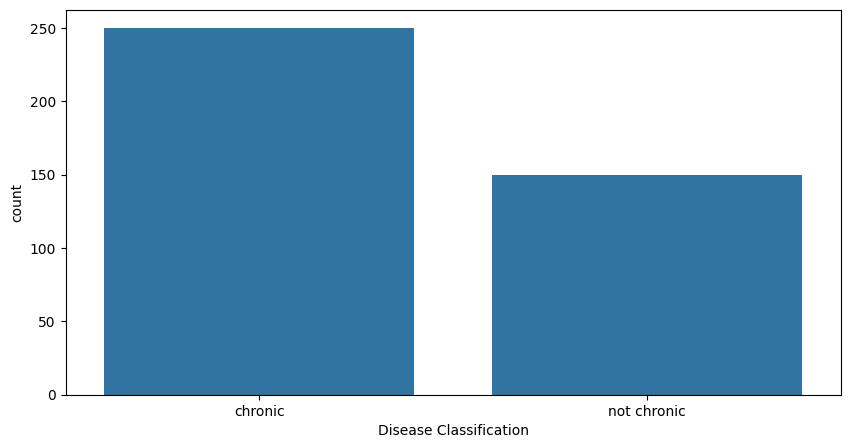

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Disease Classification')
plt.show()

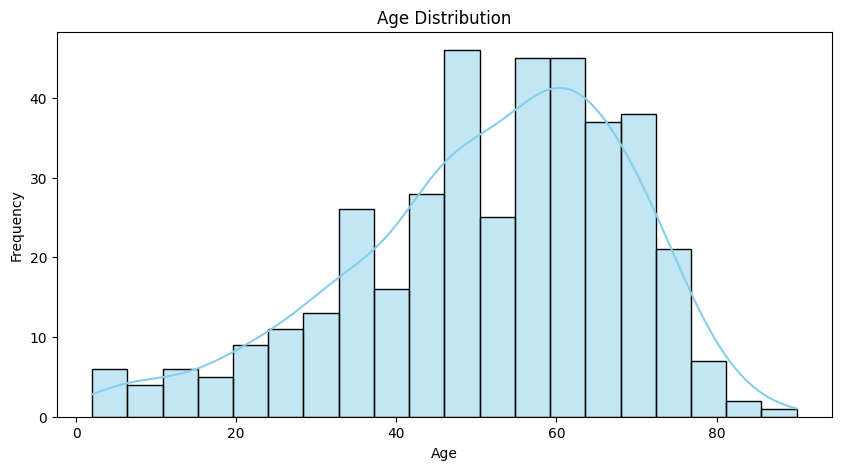

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Age',kde=True,bins=20,color='skyblue') # Change hisplot to histplot and bin to bins.
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

using hypertension

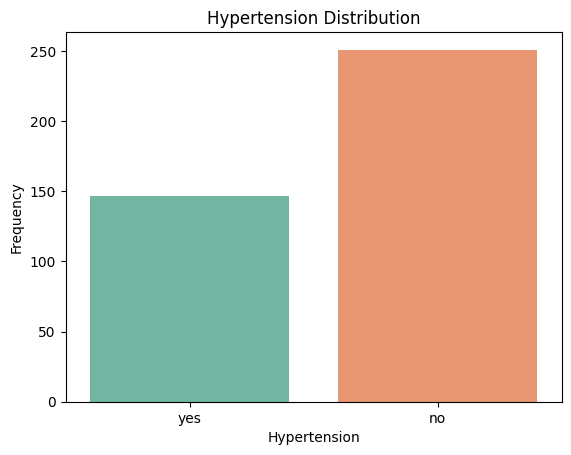

In [58]:
sns.countplot(data=df,x='Hypertension',palette='Set2')
plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Frequency')
plt.show()

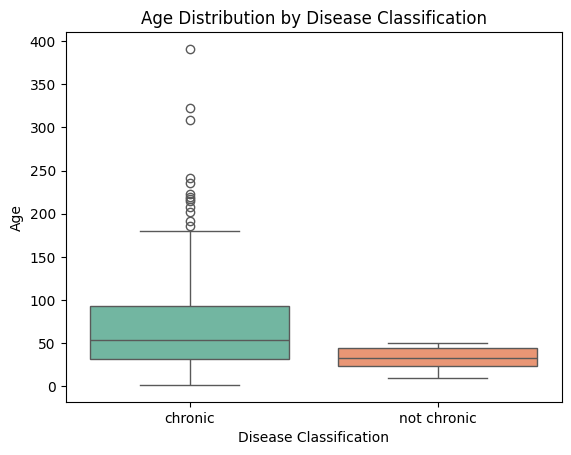

In [60]:
sns.boxplot(data=df,x='Disease Classification',y='Blood Urea',palette='Set2')
plt.title('Age Distribution by Disease Classification')
plt.xlabel('Disease Classification')
plt.ylabel('Age')
plt.show()

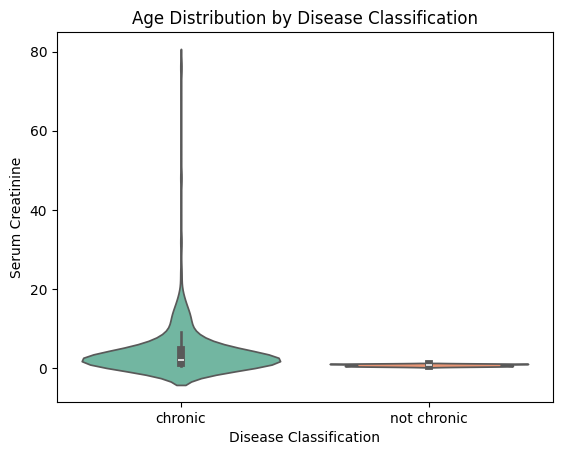

In [61]:
sns.violinplot(data=df,x='Disease Classification',y='Serum Creatinine',palette='Set2')
plt.title('Age Distribution by Disease Classification')
plt.xlabel('Disease Classification')
plt.ylabel('Serum Creatinine')
plt.show()

to insert pie chart

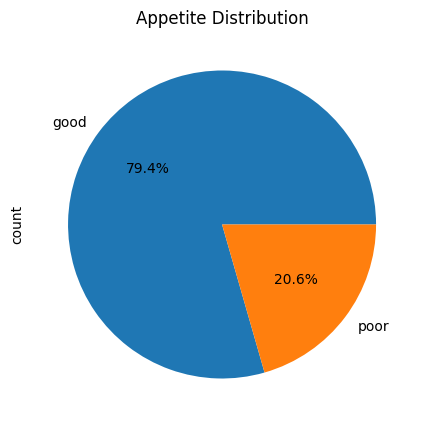

In [62]:
df.Appetite.value_counts().plot.pie(figsize=(5,5),autopct='%1.1f%%')
plt.title('Appetite Distribution')
plt.show()

Text(0.5, 0, 'Pus Cell Clumps')

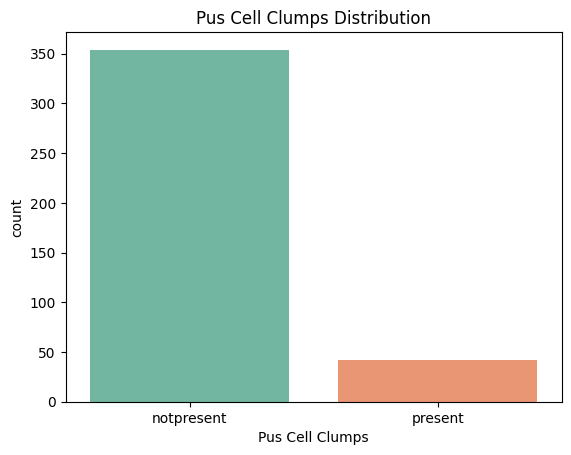

In [63]:
sns.countplot(data=df,x='Pus Cell Clumps',palette='Set2')
plt.title('Pus Cell Clumps Distribution')
plt.xlabel('Pus Cell Clumps')

Text(0.5, 0, 'Red Blood Cell Count')

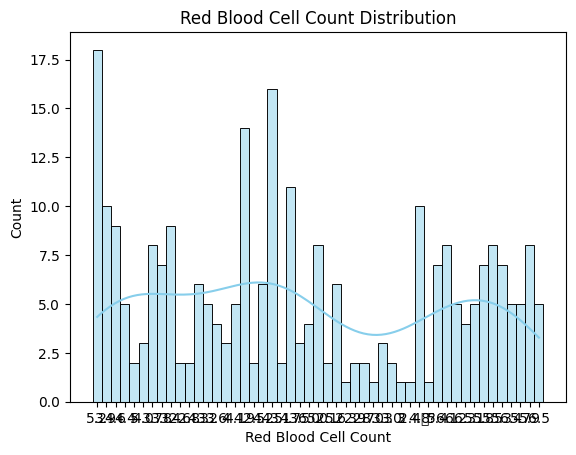

In [64]:
sns.histplot(data=df,x='Red Blood Cell Count',kde=True,bins=20,color='skyblue') # Change hisplot to histplot and bin to bins.
plt.title('Red Blood Cell Count Distribution')
plt.xlabel('Red Blood Cell Count')

Text(0.5, 0, 'White Blood Cell Count')

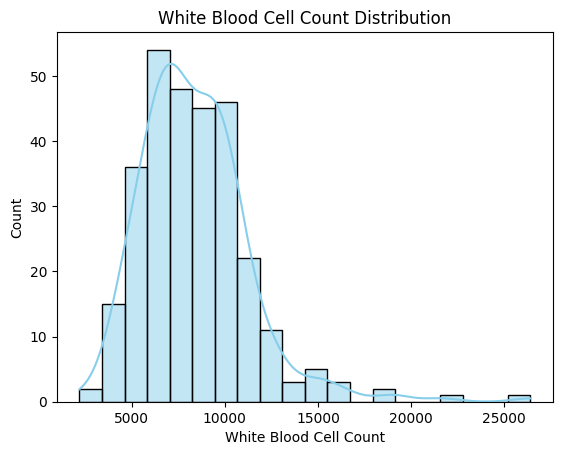

In [65]:
sns.histplot(data=df,x='White Blood Cell Count',kde=True,bins=20,color='skyblue') # Change hisplot to histplot and bin to bins.
plt.title('White Blood Cell Count Distribution')
plt.xlabel('White Blood Cell Count')

Donut plot>> Donut chart or ring chart

<Axes: ylabel='count'>

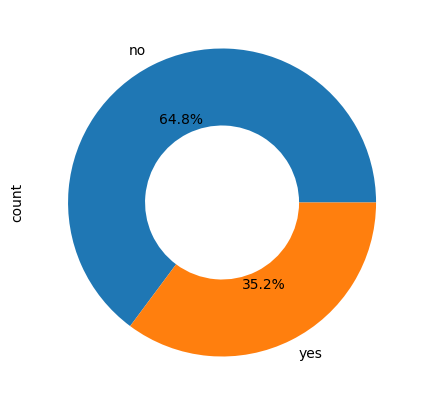

In [66]:
df['Diabetes Mellitus'].value_counts().plot.pie(figsize=(5,5),autopct='%1.1f%%',wedgeprops=dict(width=0.5))

Text(0.5, 1.0, 'Coronary Artery Disease Distribution')

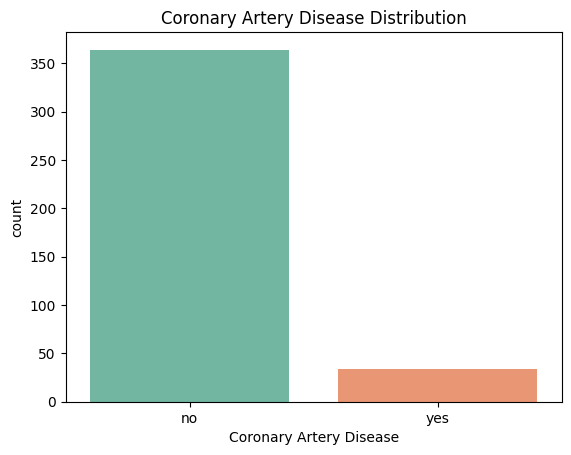

In [67]:
sns.countplot(data=df,x='Coronary Artery Disease',palette='Set2')
plt.title('Coronary Artery Disease Distribution')

Text(0.5, 1.0, 'Pedal Edema')

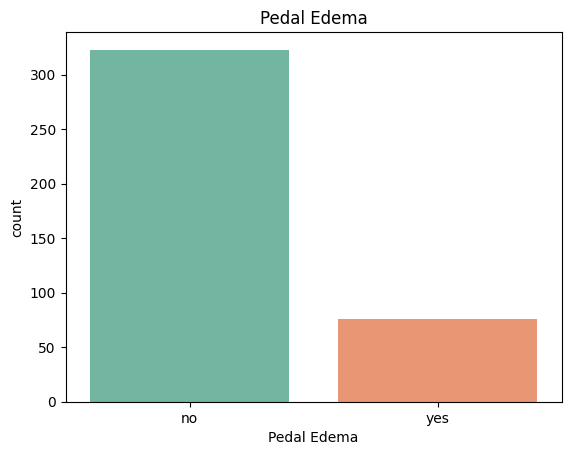

In [68]:
sns.countplot(data=df,x='Pedal Edema',palette='Set2')
plt.title('Pedal Edema')

Text(0.5, 1.0, 'Bacteria')

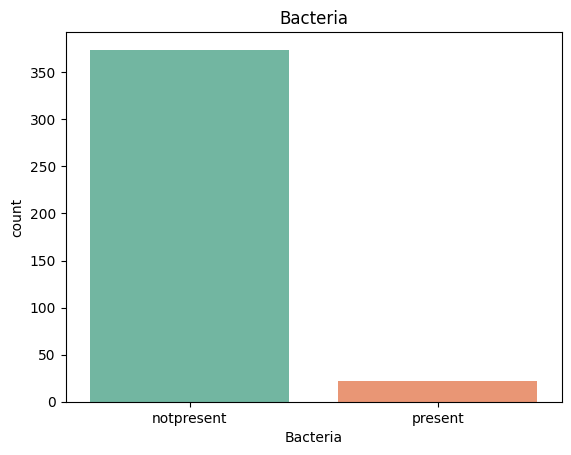

In [69]:
sns.countplot(data=df,x='Bacteria',palette='Set2')
plt.title('Bacteria')

# Bivariate analysis

In [59]:
df.columns

Index(['Patient ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Disease Classification'],
      dtype='object')

Text(0.5, 1.0, 'Age vs Red Blood Cell Count')

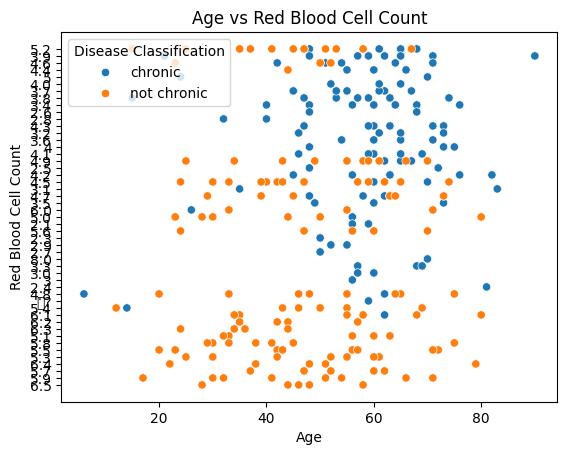

In [70]:
sns.scatterplot(data=df,x='Age',y='Red Blood Cell Count',hue='Disease Classification')
plt.title('Age vs Red Blood Cell Count')

Text(0.5, 1.0, 'Age vs White Blood Cell Count')

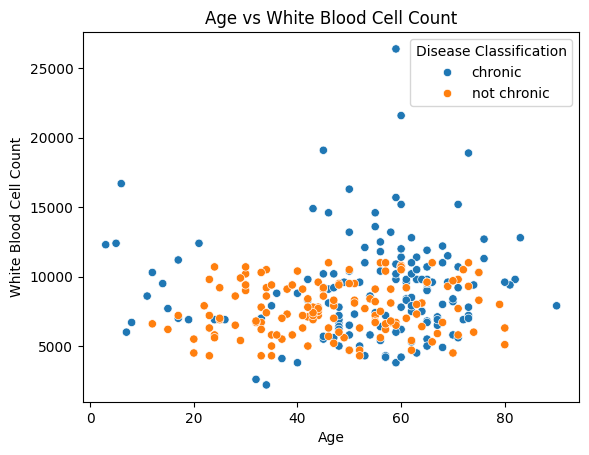

In [71]:
sns.scatterplot(data=df,x='Age',y='White Blood Cell Count',hue='Disease Classification')
plt.title('Age vs White Blood Cell Count')

Text(0, 0.5, 'Red Blood Cell Count')

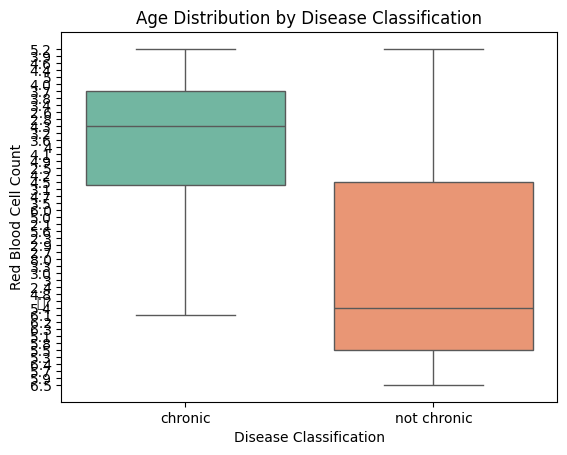

In [72]:
sns.boxplot(data=df,x='Disease Classification',y='Red Blood Cell Count',palette='Set2')
plt.title('Age Distribution by Disease Classification')
plt.xlabel('Disease Classification')
plt.ylabel('Red Blood Cell Count')

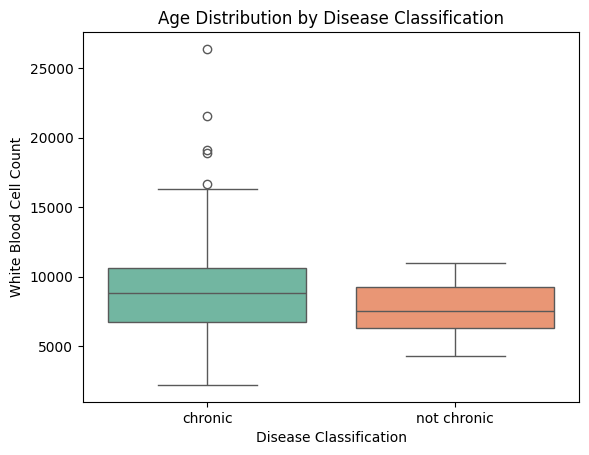

In [73]:
sns.boxplot(data=df,x='Disease Classification',y='White Blood Cell Count',palette='Set2')
plt.title('Age Distribution by Disease Classification')
plt.xlabel('Disease Classification')
plt.ylabel('White Blood Cell Count')
plt.show()

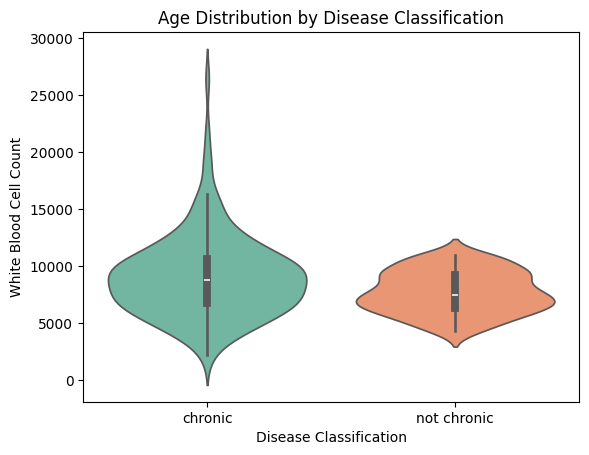

In [74]:
sns.violinplot(data=df,x='Disease Classification',y='White Blood Cell Count',palette='Set2')
plt.title('Age Distribution by Disease Classification')
plt.xlabel('Disease Classification')
plt.ylabel('White Blood Cell Count')
plt.show()

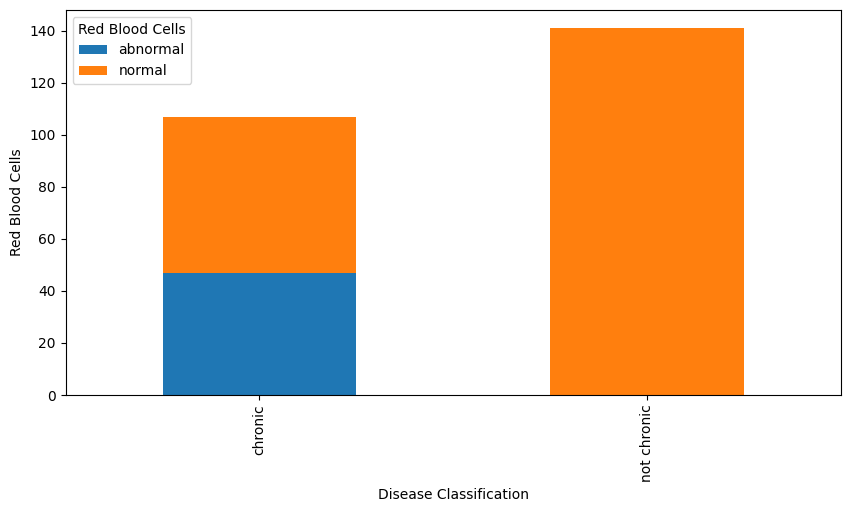

In [75]:
a=pd.crosstab(df['Disease Classification'],df['Red Blood Cells'])
a.plot(kind='bar',stacked=True,figsize=(10,5))
plt.xlabel('Disease Classification')
plt.ylabel('Red Blood Cells')
plt.show()

MULTIVARATE ANALYSIS

In [77]:
cols=['Age','Red Blood Cell Count','White Blood Cell Count']
df[cols]

,Age,Red Blood Cell Count,White Blood Cell Count
0,48.0,5.2,7800.0
1,7.0,NaN,6000.0
2,62.0,NaN,7500.0
3,48.0,3.9,6700.0
4,51.0,4.6,7300.0
...,...,...,...
395,55.0,4.9,6700.0
396,42.0,6.2,7800.0
397,12.0,5.4,6600.0
398,17.0,5.9,7200.0


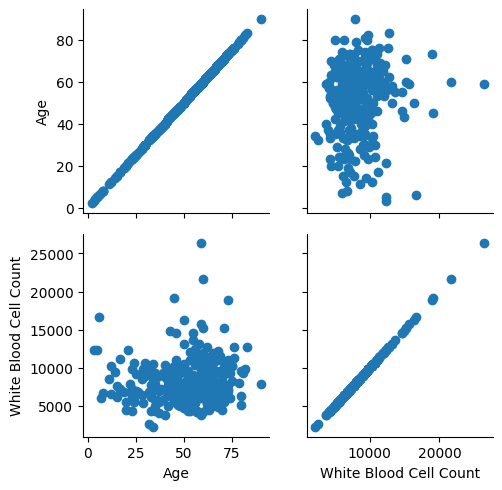

In [78]:
sns.PairGrid(df[cols]).map(plt.scatter)
plt.show()

to view co-relation value

In [83]:
corr=df[num_cols].corr()
corr

,Patient ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count
Patient ID,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298,0.630019,-0.198641
Age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339
Blood Pressure,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753
Specific Gravity,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215
Albumin,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989
Sugar,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893
Blood Glucose Random,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015
Blood Urea,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462
Serum Creatinine,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390
Sodium,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277


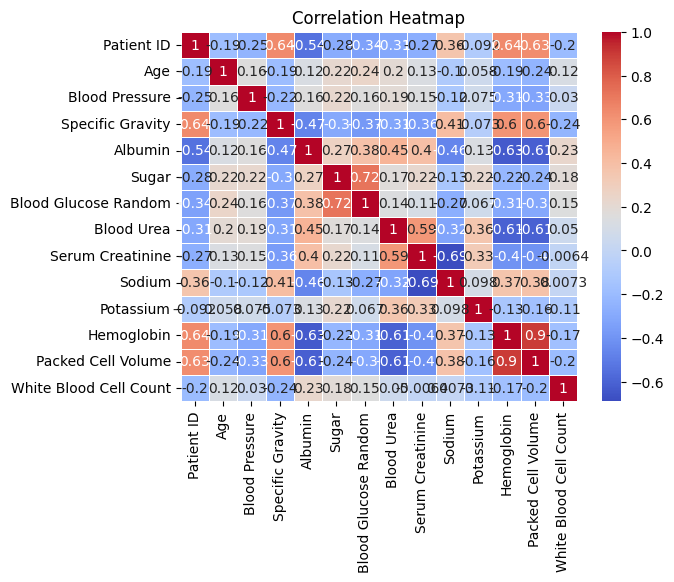

In [86]:
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 23.52222222222222, 'Disease Classification')

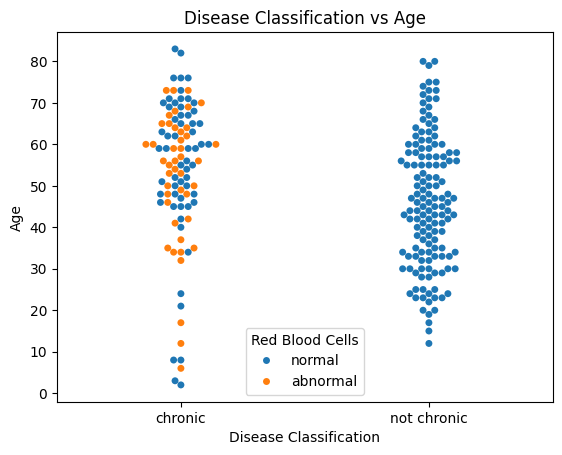

In [88]:
sns.swarmplot(data=df ,x='Disease Classification',y='Age',hue='Red Blood Cells')
plt.title('Disease Classification vs Age')
plt.xlabel('Disease Classification')

In [89]:
px.scatter(df,x='Age',y='Red Blood Cell Count',color='Disease Classification')

3D plots

In [91]:
px.scatter_3d(df,x='Age',y='Red Blood Cell Count',z='White Blood Cell Count',color='Disease Classification')
